In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv(r"C:\Users\LaptopCheckout\Downloads\ALS_TrainingData_2223.csv")


In [3]:
data_train.head()

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk_median  trunk_min  \
0       143.0      0.017422        533          8           7.0          7   
1       136.0      0.010453        649          8           7.0          5   
2       140.0      0.008929       1234          5           0.0          0   
3       138.0      0.012469       2492          5           5.0          3   
4       138.0      0.008292       2956          6           4.0          1   

   trunk_range  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min  
0     0.002646           6.0              6.0           6.0  
1     0.005386           7.0              5.0           5.0  
2     0.008929           6.0              5.0           5.0  
3     0.004988           7.0              6.0           5.0  
4     0.008489           6.0              5.0           5.0  

[5 rows x 101 columns]

In [4]:
data_test=pd.read_csv(r"C:\Users\LaptopCheckout\Downloads\ALS_TestingData_78.csv")

In [5]:
data_test.head()

ID   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   3  65.906849         46.0            44.0           43       0.024590   
1   4  54.000000         39.0            36.0           33       0.013100   
2   5  56.394521         46.0            43.0           39       0.009736   
3   6  72.619178         50.0            42.5           41       0.092784   
4   9  65.000000         45.0            42.0           36       0.021327   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -1.767329                33                  5.0                 2  ...   
1     -1.351852                32                 23.0                14  ...   
2     -0.412429                15                 10.0                 2  ...   
3     -0.383403                34                 24.0                21  ...   
4      0.000000                37                 37.0                37  ...   

   trunk_min  trunk_range  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min  \
0          0     0.006440           6.5             6.00           6.0   
1          0     0.013100           6.5             5.50           5.0   
2          0     0.000000           7.5             6.75           6.0   
3          5     0.007752           7.5             7.00           6.0   
4          7     0.000000           6.0             5.50           5.0   

   Urine.Ph_range  White.Blood.Cell..WBC._max  White.Blood.Cell..WBC._median  \
0        0.004098                        8.57                          7.680   
1        0.003275                        8.04                          6.620   
2        0.003456                        8.90                          7.160   
3        0.024194                       12.38                          7.905   
4        0.002370                       11.53                          9.290   

   White.Blood.Cell..WBC._min  White.Blood.Cell..WBC._range  
0                        6.60                      0.016148  
1                        4.97                      0.006703  
2                        5.01                      0.005410  
3                        4.96                      0.076495  
4                        7.94                      0.008507  

[5 rows x 131 columns]

<AxesSubplot:>

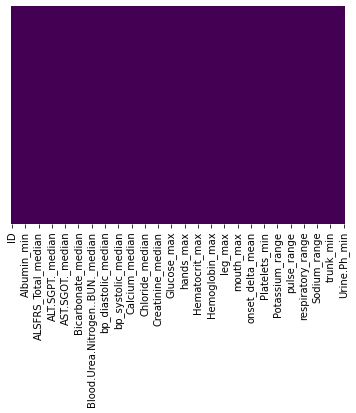

In [6]:
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

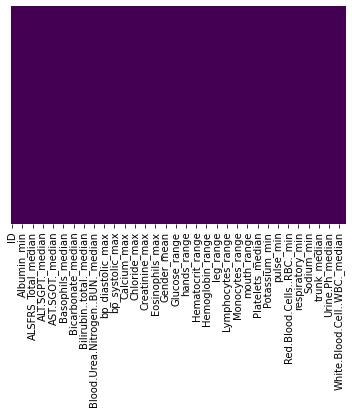

In [7]:
sns.heatmap(data_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 131 entries, ID to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(39)
memory usage: 80.0 KB


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [10]:
data_train.describe()

ID     Age_mean  Albumin_max  Albumin_median  Albumin_min  \
count  2223.000000  2223.000000  2223.000000     2223.000000  2223.000000   
mean   1214.874944    54.550157    47.011134       43.952542    40.766347   
std     696.678300    11.396546     3.233980        2.654804     3.193087   
min       1.000000    18.000000    37.000000       34.500000    24.000000   
25%     614.500000    47.000000    45.000000       42.000000    39.000000   
50%    1213.000000    55.000000    47.000000       44.000000    41.000000   
75%    1815.500000    63.000000    49.000000       46.000000    43.000000   
max    2424.000000    81.000000    70.300000       51.100000    49.000000   

       Albumin_range  ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  \
count    2223.000000   2223.000000       2223.000000          2223.000000   
mean        0.013779     -0.728274         31.692308            27.104926   
std         0.009567      0.622329          5.314228             6.633643   
min         0.000000     -4.345238         11.000000             2.500000   
25%         0.009042     -1.086310         29.000000            23.000000   
50%         0.012111     -0.620748         33.000000            28.000000   
75%         0.015873     -0.283832         36.000000            32.000000   
max         0.243902      1.207011         40.000000            40.000000   

       ALSFRS_Total_min  ...   Sodium_min  Sodium_range      SubjectID  \
count       2223.000000  ...  2223.000000   2223.000000    2223.000000   
mean          19.877193  ...   136.755061      0.015000  498880.290148   
std            8.583509  ...     2.715247      0.009283  289923.528450   
min            0.000000  ...   112.000000      0.000000     533.000000   
25%           14.000000  ...   135.000000      0.010582  240825.500000   
50%           20.000000  ...   137.000000      0.013123  496835.000000   
75%           27.000000  ...   138.000000      0.017278  750300.500000   
max           40.000000  ...   145.000000      0.142857  999482.000000   

         trunk_max  trunk_median    trunk_min  trunk_range  Urine.Ph_max  \
count  2223.000000   2223.000000  2223.000000  2223.000000   2223.000000   
mean      6.203779      4.893387     2.955915     0.007136      6.820450   
std       1.747660      2.146076     2.358095     0.004503      0.932141   
min       0.000000      0.000000     0.000000     0.000000      5.000000   
25%       5.000000      3.000000     1.000000     0.003643      6.000000   
50%       7.000000      5.000000     3.000000     0.006920      7.000000   
75%       8.000000      6.500000     5.000000     0.009639      7.000000   
max       8.000000      8.000000     8.000000     0.042017      9.000000   

       Urine.Ph_median  Urine.Ph_min  
count      2223.000000   2223.000000  
mean          5.710639      5.183221  
std           0.625039      0.437222  
min           5.000000      5.000000  
25%           5.000000      5.000000  
50%           6.000000      5.000000  
75%           6.000000      5.000000  
max           9.000000      8.000000  

[8 rows x 101 columns]

In [11]:
data_test.describe()

ID   Age_mean  Albumin_max  Albumin_median  Albumin_min  \
count   78.000000  78.000000    78.000000       78.000000    78.000000   
mean    51.589744  56.025571    45.256410       42.173077    38.910256   
std     28.468910  10.514606     3.056549        3.083341     3.977815   
min      3.000000  24.583562    38.000000       35.000000    25.000000   
25%     27.250000  51.000000    43.000000       40.000000    36.250000   
50%     51.500000  57.000000    45.500000       42.250000    39.000000   
75%     74.750000  62.180822    47.000000       44.000000    41.000000   
max    100.000000  77.000000    51.000000       49.000000    47.000000   

       Albumin_range  ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  \
count      78.000000     78.000000         78.000000            78.000000   
mean        0.016753     -0.825866         29.807692            21.544872   
std         0.013419      0.649497          6.107389             8.995015   
min         0.004138     -3.041667         13.000000             2.000000   
25%         0.011006     -1.315287         26.000000            16.500000   
50%         0.013761     -0.679723         31.000000            22.000000   
75%         0.018015     -0.390660         34.000000            28.000000   
max         0.092784      0.325893         40.000000            39.000000   

       ALSFRS_Total_min  ...  trunk_min  trunk_range  Urine.Ph_max  \
count         78.000000  ...  78.000000    78.000000     78.000000   
mean          14.705128  ...   1.871795     0.007133      7.076923   
std            9.532050  ...   2.211886     0.003980      0.674570   
min            0.000000  ...   0.000000     0.000000      6.000000   
25%            8.000000  ...   0.000000     0.004490      6.500000   
50%           14.000000  ...   1.000000     0.006365      7.000000   
75%           21.000000  ...   3.000000     0.009639      7.500000   
max           37.000000  ...   7.000000     0.019048      9.000000   

       Urine.Ph_median  Urine.Ph_min  Urine.Ph_range  \
count        78.000000     78.000000       78.000000   
mean          6.192308      5.564103        0.004544   
std           0.572536      0.458392        0.004776   
min           5.500000      5.000000        0.000000   
25%           5.812500      5.000000        0.002278   
50%           6.000000      5.500000        0.003390   
75%           6.500000      6.000000        0.004715   
max           7.500000      7.000000        0.034483   

       White.Blood.Cell..WBC._max  White.Blood.Cell..WBC._median  \
count                   78.000000                      78.000000   
mean                     9.341795                       6.789103   
std                      2.939529                       1.683264   
min                      4.110000                       3.240000   
25%                      7.767500                       5.878750   
50%                      8.750000                       6.720000   
75%                     10.690000                       7.730000   
max                     22.490000                      11.795000   

       White.Blood.Cell..WBC._min  White.Blood.Cell..WBC._range  
count                   78.000000                     78.000000  
mean                     5.286026                      0.012203  
std                      1.513861                      0.014724  
min                      1.430000                      0.003078  
25%                      4.330000                      0.005658  
50%                      5.320000                      0.008402  
75%                      6.125000                      0.012471  
max                      9.500000                      0.092045  

[8 rows x 131 columns]

<AxesSubplot:>

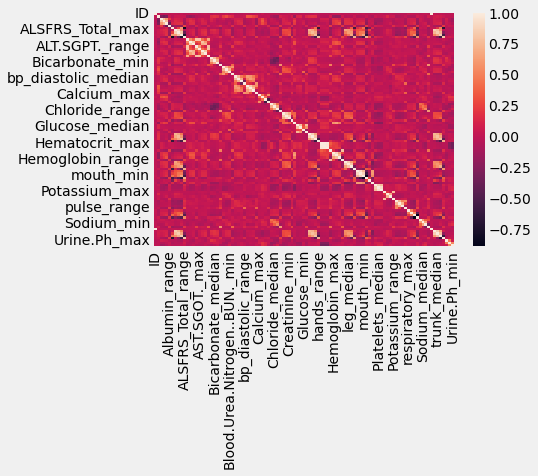

In [81]:
sns.heatmap(data_train.corr())

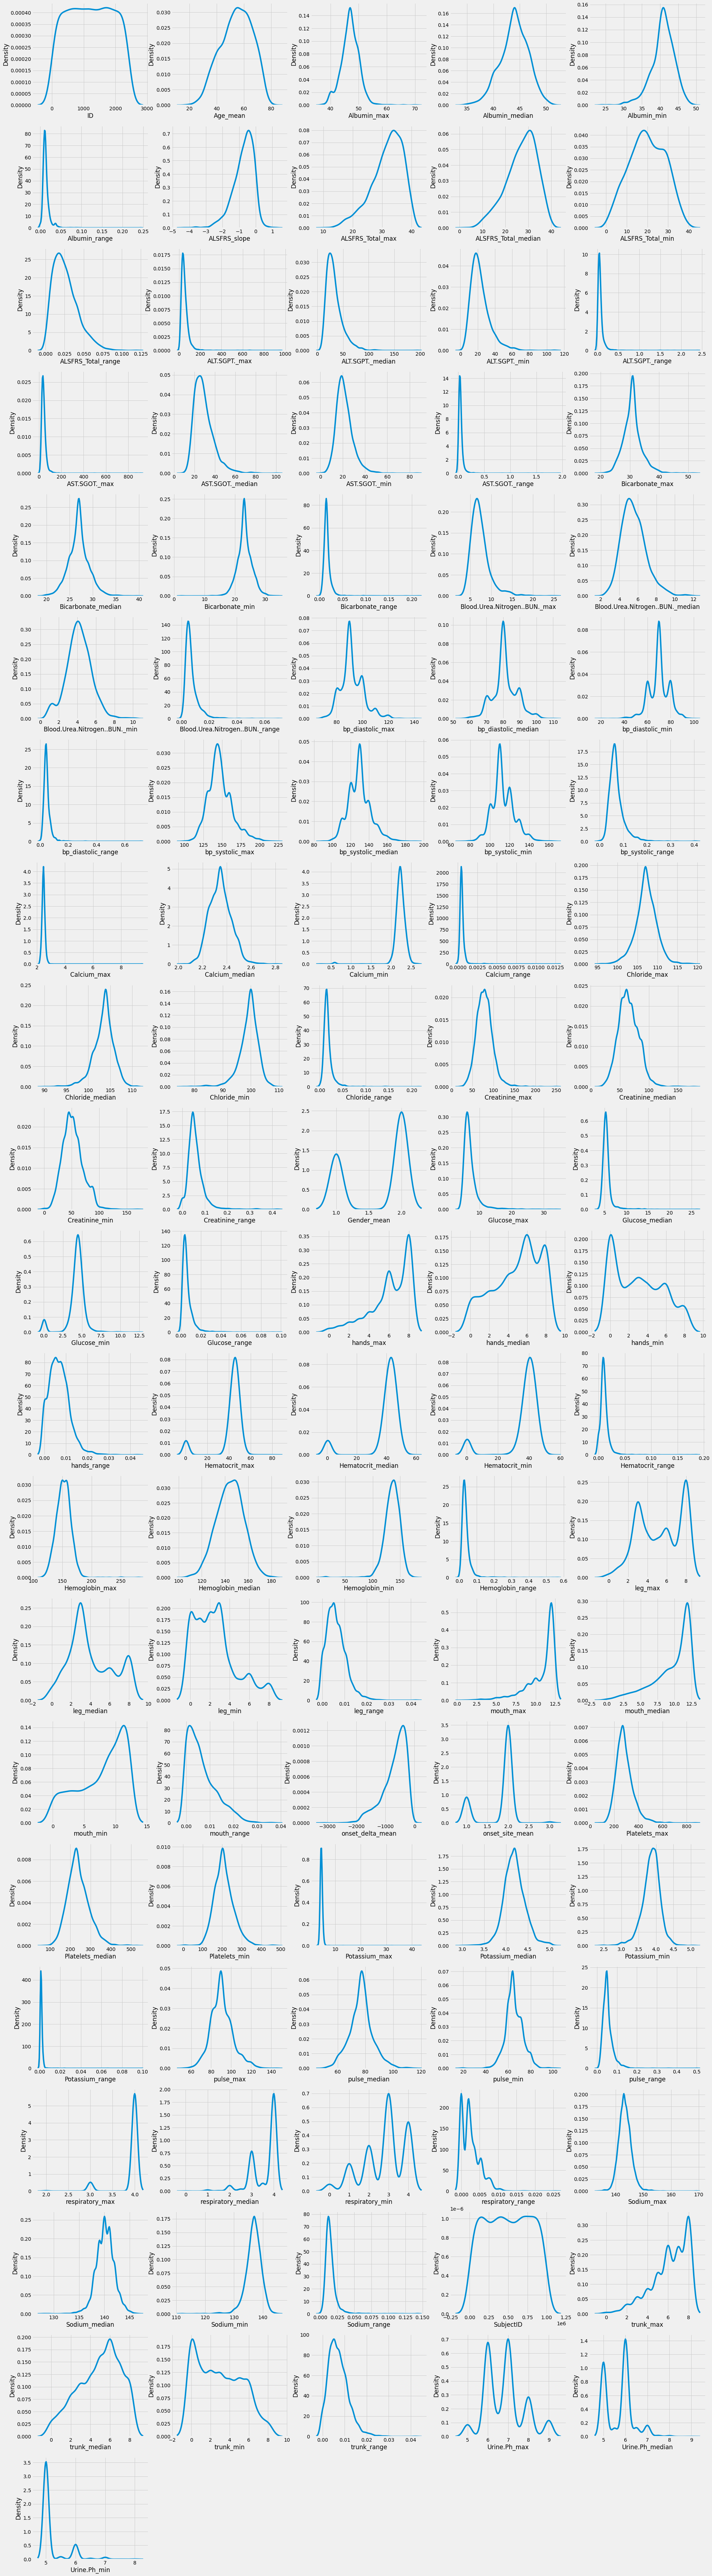

In [82]:
plt.figure(figsize=(30,140))
for i, col in enumerate(data_train.columns):
    if data_train[col].dtype != 'object':
        ax = plt.subplot(24, 5, i+1)
        sns.kdeplot(data_train[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

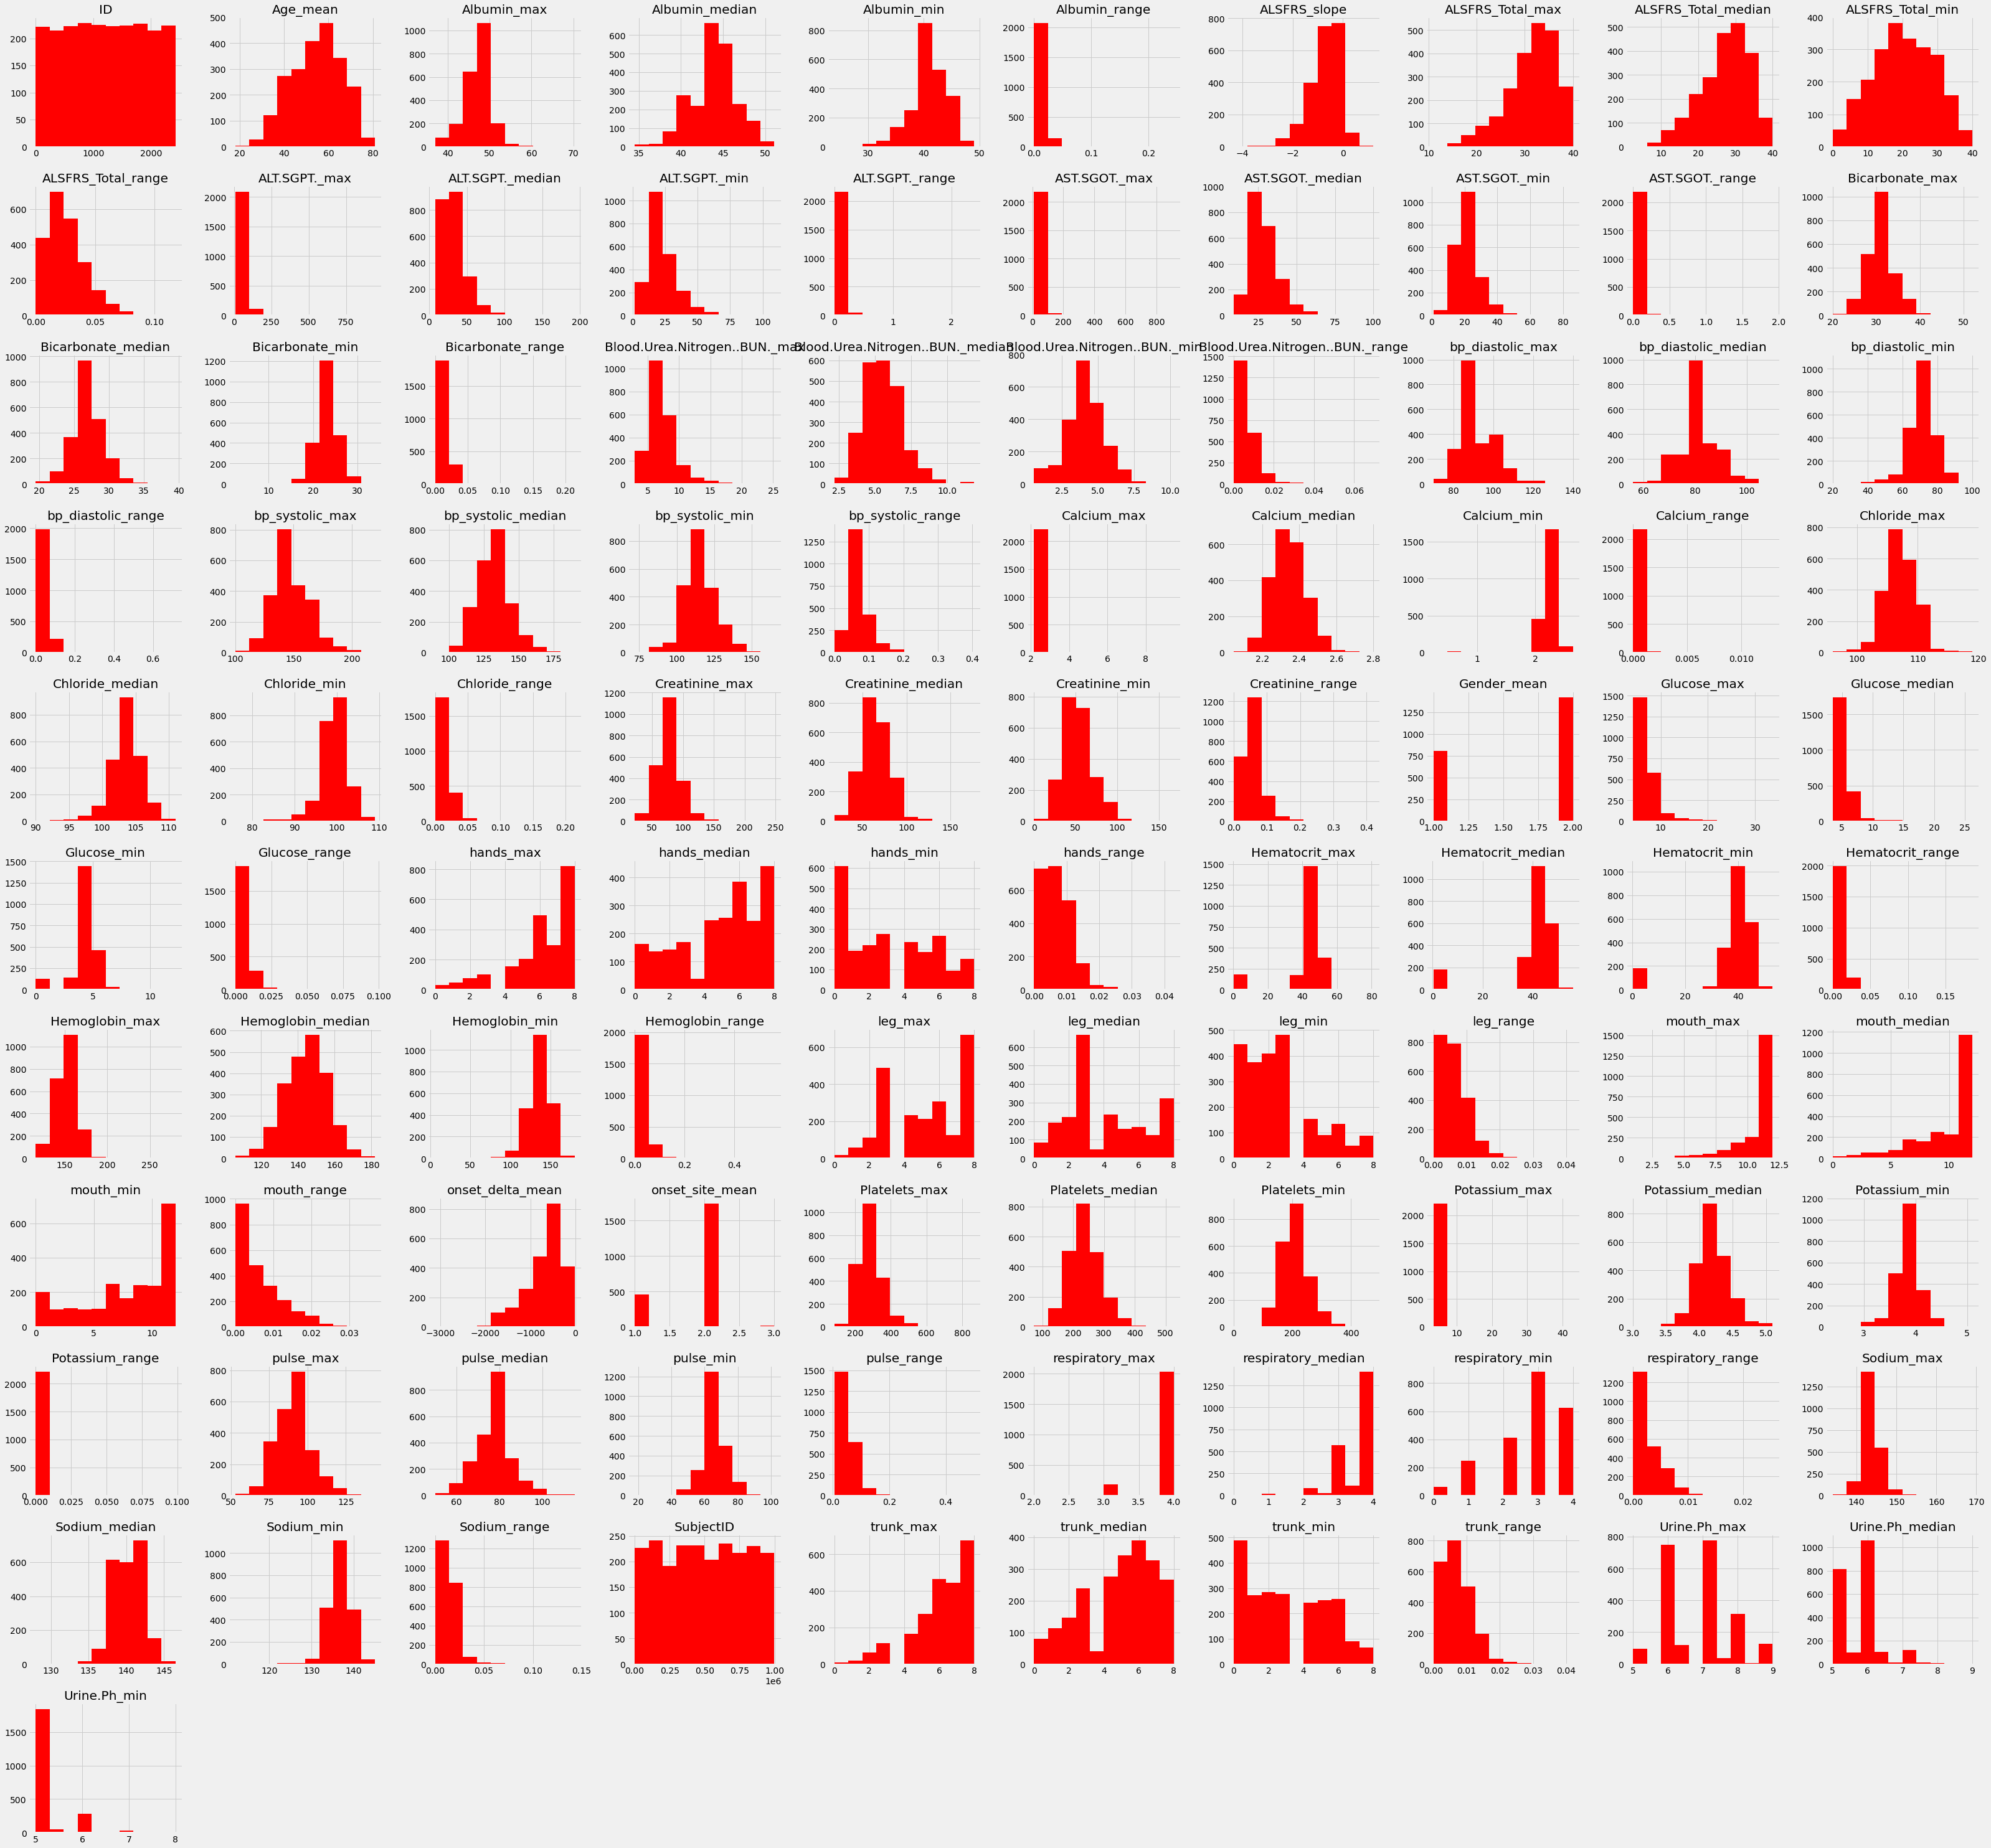

In [55]:
hist_plot = data_train.hist(figsize=(50,50), color="red")

In [13]:
X = data_train.drop(['ALSFRS_slope'],axis=1)

y=data_train['ALSFRS_slope']


In [63]:
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [64]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Best_features','Score']  
print(featureScores.nlargest(10,'Score'))

         Best_features     Score
9   ALSFRS_Total_range  6.931123
96         trunk_range  3.597656
54         hands_range  3.185063
66           leg_range  2.656949
8     ALSFRS_Total_min  2.589007
5        Albumin_range  2.526327
70         mouth_range  2.464912
29  bp_diastolic_range  2.274456
13     ALT.SGPT._range  2.070743
95           trunk_min  1.803363


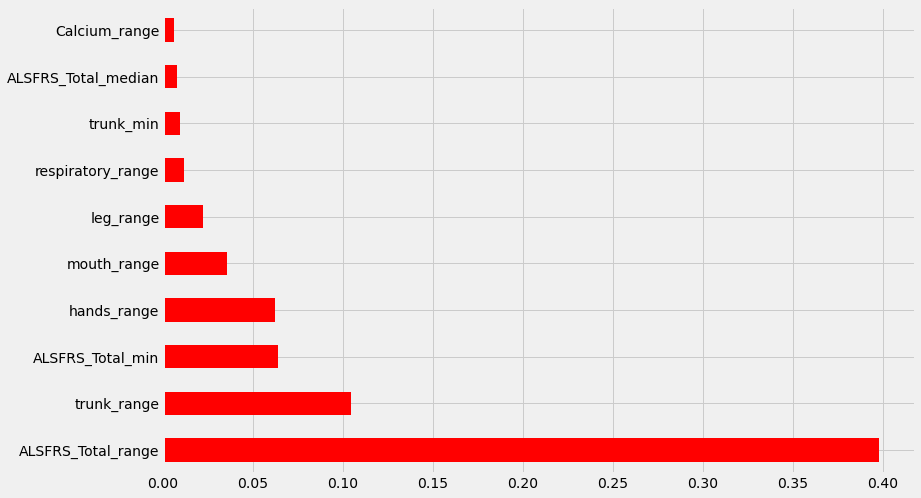

In [65]:
feature_selection = ExtraTreesRegressor()
feature_selection.fit(X, y)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(feature_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color="red")
plt.show()

In [17]:
cols=featureScores.nlargest(10,'Score')['Best_features'].values
cols

array(['ALSFRS_Total_range', 'trunk_range', 'hands_range', 'leg_range',
       'ALSFRS_Total_min', 'Albumin_range', 'mouth_range',
       'bp_diastolic_range', 'ALT.SGPT._range', 'trunk_min'], dtype=object)

In [66]:
data_new_columns=['ALSFRS_Total_range', 'trunk_range', 'hands_range', 'leg_range',
       'ALSFRS_Total_min', 'Albumin_range', 'mouth_range',
       'bp_diastolic_range', 'ALT.SGPT._range', 'trunk_min','ALSFRS_slope']
data_new=data_train[data_new_columns]
data_new.head()

ALSFRS_Total_range  trunk_range  hands_range  leg_range  ALSFRS_Total_min  \
0            0.021164     0.002646     0.005291   0.010582                22   
1            0.028725     0.005386     0.003591   0.008977                21   
2            0.025000     0.008929     0.007143   0.003571                10   
3            0.014963     0.004988     0.004988   0.004988                24   
4            0.020374     0.008489     0.008489   0.003396                20   

   Albumin_range  mouth_range  bp_diastolic_range  ALT.SGPT._range  trunk_min  \
0       0.066202     0.013228            0.055556         0.020906          7   
1       0.010453     0.008977            0.028725         0.029617          5   
2       0.008929     0.010714            0.050000         0.019643          0   
3       0.012111     0.000000            0.049875         0.052369          3   
4       0.008292     0.000000            0.053068         0.026534          1   

   ALSFRS_slope  
0     -0.965608  
1     -0.921717  
2     -0.914787  
3     -0.598361  
4     -0.444039

<AxesSubplot:ylabel='ALSFRS_slope'>

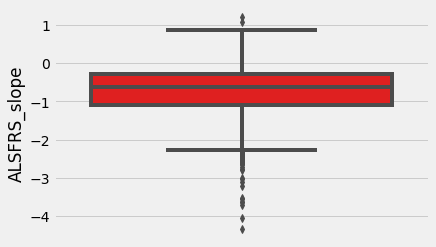

In [56]:
sns.boxplot( y=df_new["ALSFRS_slope"], color="red" )

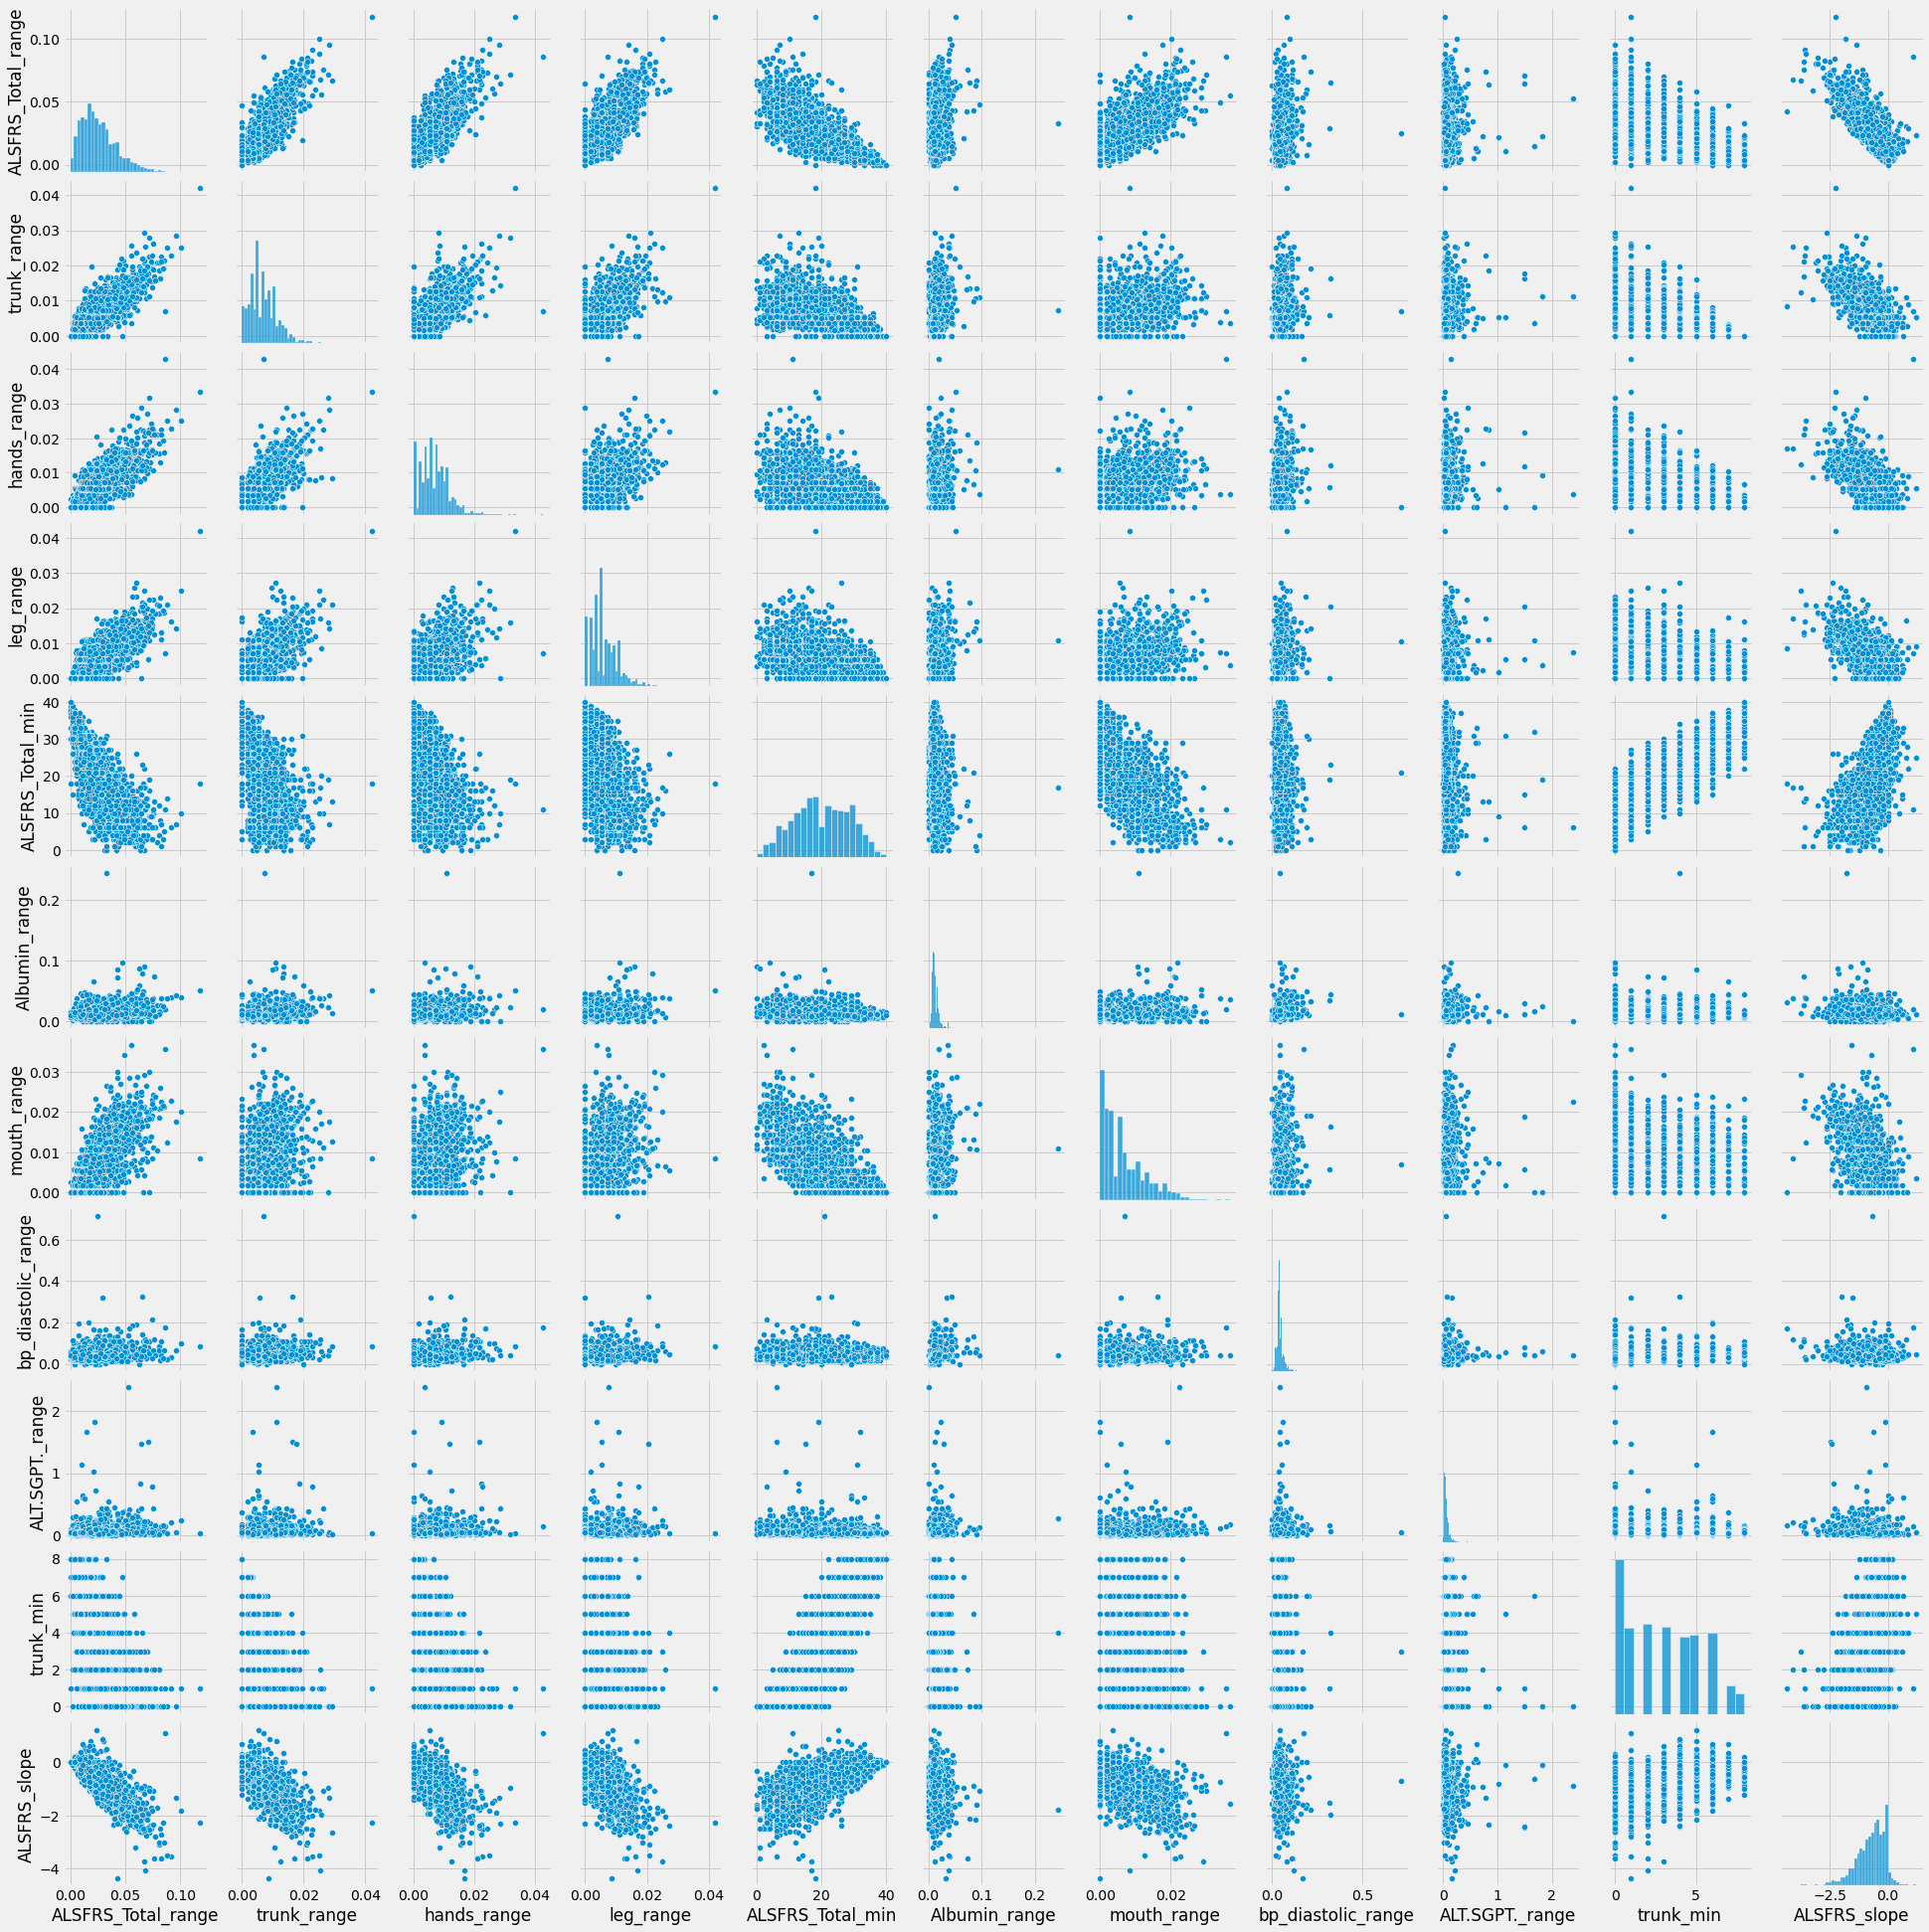

In [67]:
sns.pairplot(data_new)


In [68]:
scaler=MinMaxScaler()
data_new[['ALSFRS_Total_min', 'trunk_min']] = scaler.fit_transform(data_new[['ALSFRS_Total_min','trunk_min']].to_numpy())
data_new.head()

ALSFRS_Total_range  trunk_range  hands_range  leg_range  ALSFRS_Total_min  \
0            0.021164     0.002646     0.005291   0.010582             0.550   
1            0.028725     0.005386     0.003591   0.008977             0.525   
2            0.025000     0.008929     0.007143   0.003571             0.250   
3            0.014963     0.004988     0.004988   0.004988             0.600   
4            0.020374     0.008489     0.008489   0.003396             0.500   

   Albumin_range  mouth_range  bp_diastolic_range  ALT.SGPT._range  trunk_min  \
0       0.066202     0.013228            0.055556         0.020906      0.875   
1       0.010453     0.008977            0.028725         0.029617      0.625   
2       0.008929     0.010714            0.050000         0.019643      0.000   
3       0.012111     0.000000            0.049875         0.052369      0.375   
4       0.008292     0.000000            0.053068         0.026534      0.125   

   ALSFRS_slope  
0     -0.965608  
1     -0.921717  
2     -0.914787  
3     -0.598361  
4     -0.444039

In [69]:
data_test_columns=['ALSFRS_Total_range', 'trunk_range', 'hands_range', 'leg_range',
       'ALSFRS_Total_min', 'Albumin_range', 'mouth_range',
       'bp_diastolic_range', 'ALT.SGPT._range', 'trunk_min','ALSFRS_slope']

data_test_new=data_test[data_test_columns]
data_test_new.head()

ALSFRS_Total_range  trunk_range  hands_range  leg_range  ALSFRS_Total_min  \
0            0.028519     0.006440     0.006440   0.007360                 2   
1            0.039301     0.013100     0.013100   0.010917                14   
2            0.017173     0.000000     0.000000   0.000000                 2   
3            0.033592     0.007752     0.007752   0.007752                21   
4            0.000000     0.000000     0.000000   0.000000                37   

   Albumin_range  mouth_range  bp_diastolic_range  ALT.SGPT._range  trunk_min  \
0       0.024590     0.005520            0.180328         0.581967          0   
1       0.013100     0.002183            0.067686         0.056769          0   
2       0.009736     0.011889            0.026420         0.043115          0   
3       0.092784     0.015504            0.134021         0.917526          5   
4       0.021327     0.000000            0.078199         0.082938          7   

   ALSFRS_slope  
0     -1.767329  
1     -1.351852  
2     -0.412429  
3     -0.383403  
4      0.000000

In [70]:
data_test_new[['ALSFRS_Total_min', 'trunk_min']] = scaler.fit_transform(data_test_new[['ALSFRS_Total_min','trunk_min']].to_numpy())
data_test_new.head()

ALSFRS_Total_range  trunk_range  hands_range  leg_range  ALSFRS_Total_min  \
0            0.028519     0.006440     0.006440   0.007360          0.054054   
1            0.039301     0.013100     0.013100   0.010917          0.378378   
2            0.017173     0.000000     0.000000   0.000000          0.054054   
3            0.033592     0.007752     0.007752   0.007752          0.567568   
4            0.000000     0.000000     0.000000   0.000000          1.000000   

   Albumin_range  mouth_range  bp_diastolic_range  ALT.SGPT._range  trunk_min  \
0       0.024590     0.005520            0.180328         0.581967   0.000000   
1       0.013100     0.002183            0.067686         0.056769   0.000000   
2       0.009736     0.011889            0.026420         0.043115   0.000000   
3       0.092784     0.015504            0.134021         0.917526   0.714286   
4       0.021327     0.000000            0.078199         0.082938   1.000000   

   ALSFRS_slope  
0     -1.767329  
1     -1.351852  
2     -0.412429  
3     -0.383403  
4      0.000000

In [71]:
X_train=data_new.drop(['ALSFRS_slope'],axis=1)
X_test=data_test_new.drop(['ALSFRS_slope'],axis=1)

In [72]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    y_pred=kmeans.predict(X_test)
    print(y_pred)
    sse.append(kmeans.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 0]
[1 1 1 0 0 1 1 1 0 2 1 1 1 1 0 0 0 1 1 0 0 1 1 1 2 1 1 1 2 1 0 1 1 1 0 1 0
 1 0 1 2 1 1 2 1 1 2 2 0 1 1 1 1 1 1 0 1 1 2 2 0 2 1 1 2 1 2 1 1 2 1 2 1 0
 1 1 0 2]
[2 2 2 3 1 0 2 2 1 0 2 2 2 2 1 1 3 2 0 1 1 2 2 2 0 2 2 2 3 2 3 2 2 0 3 0 1
 2 3 2 3 2 2 3 2 0 0 0 1 0 2 2 2 2 0 1 2 2 3 0 1 0 2 2 0 2 0 2 2 0 2 0 0 3
 2 2 3 3]
[1 1 1 3 4 2 1 1 4 2 1 1 1 1 4 4 4 1 2 4 4 1 1 1 2 1 1 1 0 1 4 1 1 2 4 2 4
 1 0 1 0 1 1 0 1 2 2 0 4 2 1 1 1 1 2 4 1 1 0 0 4 2 1 1 0 1 2 1 1 0 1 0 2 4
 1 1 4 0]
[1 2 1 5 0 4 2 1 0 4 1 1 1 1 0 0 3 2 4 0 0 1 1 2 4 1 2 1 3 1 3 1 1 2 3 4 0
 1 3 1 3 1 1 4 1 2 2 4 0 4 1 1 1 1 2 0 1 2 3 4 0 4 2 2 4 1 2 1 2 4 1 4 2 3
 2 1 3 4]
[6 2 6 3 5 1 2 2 5 1 6 6 6 6 5 5 4 2 1 5

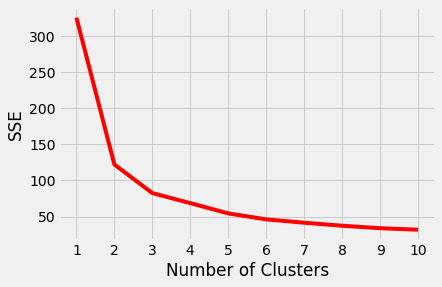

In [73]:

plt.plot(range(1, 11), sse,color="red")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [74]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)
print(y_pred)
print(kmeans.cluster_centers_)

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 0]
[[0.01643255 0.00449639 0.00449671 0.00472936 0.67814342 0.01275643
  0.00427326 0.04518471 0.06190519 0.64366405]
 [0.03414794 0.00936546 0.00889845 0.00737361 0.34383817 0.01464258
  0.00855558 0.04974802 0.07893589 0.13786307]]


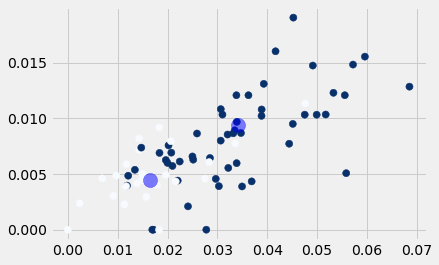

In [75]:
centers = kmeans.cluster_centers_
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, s=50, cmap='Blues');
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of model when k=2 is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of model when k=2 is 0.5273783790204846


In [78]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of model when k=3  ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of model when k=3  0.43557880890473233


In [79]:

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_train)

print('Silhoutte score of our when k=4  is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of our when k=4  is 0.4441745033896004
